# Tutorial
In this tutorial we will walk through and demonstrate the basics of using the module `approximating_maxima` and in particular the methods of `ApproximateMaxima`.  

## Introduction

### Lipschitz Continuity
Suppose $a$ and $b$ are real numbers and $f:[a,b]\to\mathbb{R}$ is a real-valued function defined on the interval $[a,b]$. We say that $f$ is *Lipschitz continuous* if there exists a real number $M$ such that, for all $x_1$ and $x_2$ in the interval $[a,b]$,
$$|f(x_{1})-f(x_{2})|\leq K|x_{1}-x_{2}|.$$
In this case we call $M$ a Lipschitz constraint of the function $f$. 

In [1]:
# All necessary functions can be accessed as methods of the ApproximateMaxima class.
from approximating_maxima import ApproximateMaxima

In [2]:
# First we create an instance of an ApproximateMaxima class object using the desired interval and Lipschitz constraint.
approximation = ApproximateMaxima((0,10),3)

# The parameter sample_function can be set at the time of instantiation or as follows.
approximation.sample_function="x*x*x+x*x"


When setting the sample function (either at the time of instantiation as follows) please *ensure* <em>ensure</em> that:

1. Your input is a string.
2. Your equation has only one variable and it is denoted by `x`.
3. Your equation is formatted Pythonically. i.e. Use <em>`'x*x'`</em> to represent the function $x^2$ rather than using `'x^2'`.

In [3]:
# To add new points to the approximation we call the method add_n_points()
approximation.add_n_points(10,'random')

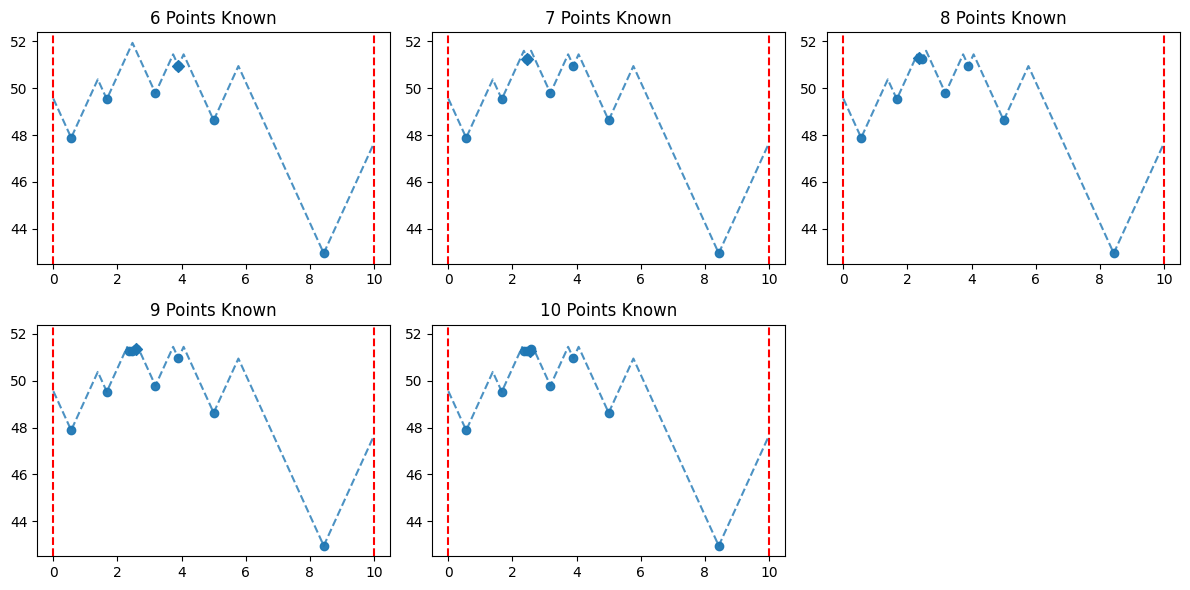

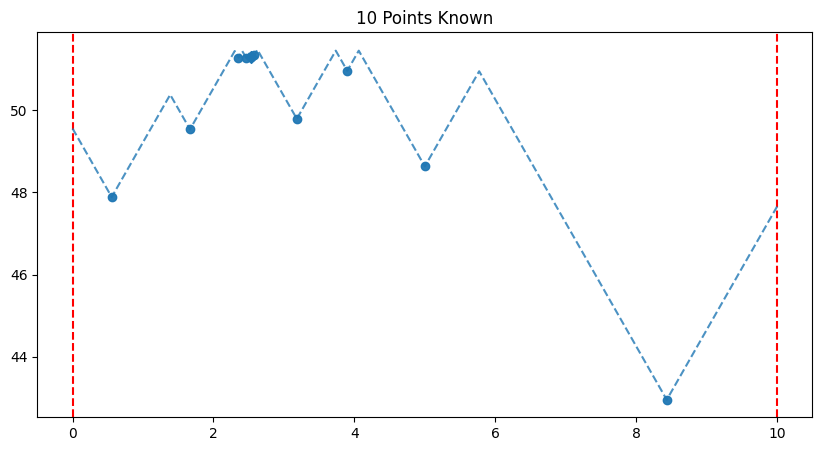

In [4]:
approximation.display_graphs(5)

In [5]:
print(list(zip(approximation.known_x,approximation.known_y)))

[(0.5555555555555556, 47.88496397135045), (1.6666666666666667, 49.53184233822687), (2.3547915206520043, 51.27549801931005), (2.4675723870788797, 51.25787430090226), (2.5370336005181007, 51.28276879177217), (2.580353253505755, 51.336298982256956), (3.1831559290884486, 49.787808873434805), (3.898739471098017, 50.95491836497553), (5.0, 48.630777912757566), (8.433451602829924, 42.95723471630173)]


In [6]:
approximation.get_known_pairs()

[(0.5555555555555556, 47.88496397135045),
 (1.6666666666666667, 49.53184233822687),
 (2.3547915206520043, 51.27549801931005),
 (2.4675723870788797, 51.25787430090226),
 (2.5370336005181007, 51.28276879177217),
 (2.580353253505755, 51.336298982256956),
 (3.1831559290884486, 49.787808873434805),
 (3.898739471098017, 50.95491836497553),
 (5.0, 48.630777912757566),
 (8.433451602829924, 42.95723471630173)]

In [7]:
approximation.known_y

array([47.88496397, 49.53184234, 51.27549802, 51.2578743 , 51.28276879,
       51.33629898, 49.78780887, 50.95491836, 48.63077791, 42.95723472])

In [8]:
approx1=ApproximateMaxima((0,10),3)
approx1.add_n_points(10,'optimal')

In [9]:
approx2=ApproximateMaxima((0,10),3)
approx2.add_n_points(10,'optimal')

In [10]:
approx2.get_known_pairs()

[(0.5555555555555556, -43.9403753586447),
 (1.6666666666666667, -43.9403753586447),
 (2.5, -43.9403753586447),
 (3.3333333333333335, -43.9403753586447),
 (4.166666666666667, -43.9403753586447),
 (5.0, -43.9403753586447),
 (5.833333333333333, -43.9403753586447),
 (6.666666666666667, -43.9403753586447),
 (8.333333333333334, -43.9403753586447),
 (9.444444444444445, -43.9403753586447)]

In [11]:
approx3=ApproximateMaxima((0,10),3,starting_points=[(0.5555555555555556, -17.10732864819269),
 (1.6666666666666667, -17.10732864819269),
 (2.5, -17.10732864819269),
 (3.3333333333333335, -17.10732864819269),
 (4.166666666666667, -17.10732864819269),
 (5.0, -17.10732864819269),
 (5.833333333333333, -17.10732864819269),
 (6.666666666666667, -17.10732864819269),
 (8.333333333333334, -17.10732864819269),
 (9.444444444444445, -17.10732864819269)])

In [12]:
approx1._interval_y

array([-26.66997775, -26.66997775, -27.08664442, -27.08664442,
       -27.08664442, -27.08664442, -27.08664442, -27.08664442,
       -25.83664442, -26.66997775, -26.66997775])

In [13]:
approx3._interval_y

array([-15.44066198, -15.44066198, -15.85732865, -15.85732865,
       -15.85732865, -15.85732865, -15.85732865, -15.85732865,
       -14.60732865, -15.44066198, -15.44066198])

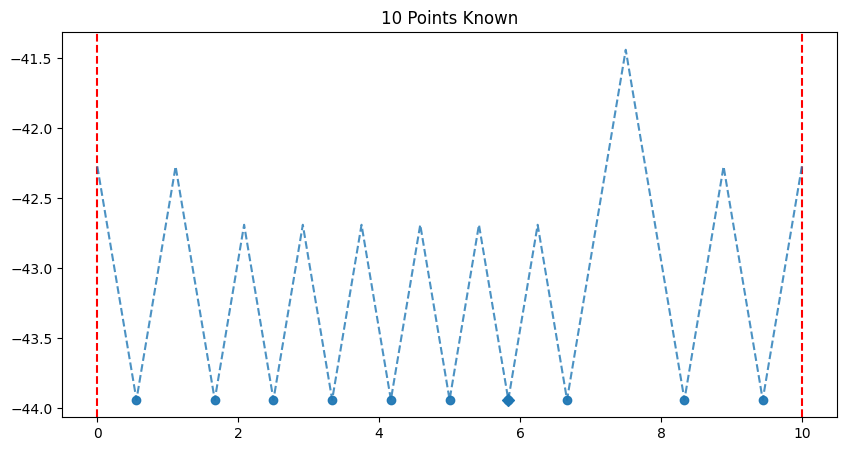

In [14]:
approx2.display_graphs(1)

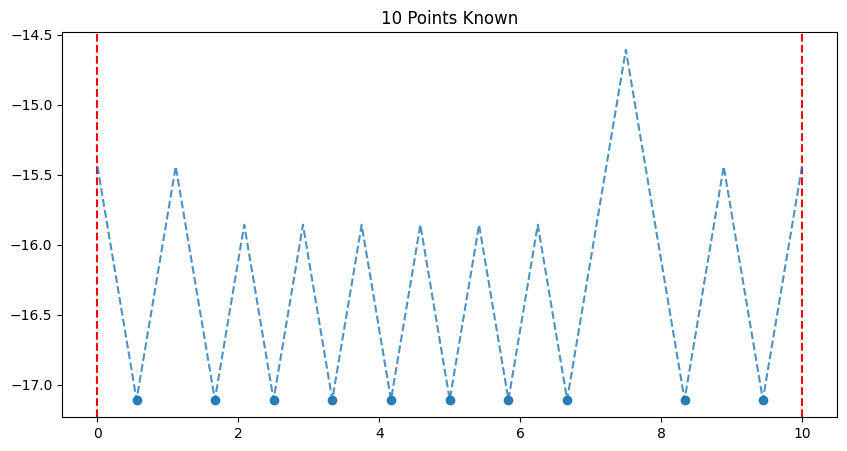

In [15]:
approx3.display_graphs(1)

In [16]:
approx3.known_y==approx2.known_y

array([False, False, False, False, False, False, False, False, False,
       False])

In [17]:
approx2._interval_y==approx3._interval_y

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [18]:
for x in approx2.graphs[1].__dict__.keys():
    print(x)

known_x
known_y
interval_x
interval_y
max_y
max_possible_y
latest_x
latest_y


In [19]:
approx2.known_x

array([0.55555556, 1.66666667, 2.5       , 3.33333333, 4.16666667,
       5.        , 5.83333333, 6.66666667, 8.33333333, 9.44444444])

In [20]:
approx2.__dict__['known_x']=[3,5]

In [21]:
approx2.known_x

[3, 5]

In [22]:
approx2.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,7.50,-43.940375,-28.940375,-36.440375
2,7.50,-43.940375,-28.940375,-36.440375
3,2.50,-43.940375,-38.940375,-41.440375
4,2.50,-43.940375,-38.940375,-41.440375
5,2.50,-43.940375,-38.940375,-41.440375
6,2.50,-43.940375,-38.940375,-41.440375
7,1.25,-43.940375,-41.440375,-42.690375
8,1.25,-43.940375,-41.440375,-42.690375
9,1.25,-43.940375,-41.440375,-42.690375


In [23]:
approx2.results_df[approx2.results_df.index<5]

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,7.5,-43.940375,-28.940375,-36.440375
2,7.5,-43.940375,-28.940375,-36.440375
3,2.5,-43.940375,-38.940375,-41.440375
4,2.5,-43.940375,-38.940375,-41.440375


In [24]:
nonadapt_approx=ApproximateMaxima((0,11),5)
nonadapt_approx.known_x


array([], dtype=float64)

In [25]:
nonadapt_approx.add_n_points(7,'optimal',adaptive=False)
nonadapt_approx.known_x

array([ 0.78571429,  2.35714286,  3.92857143,  5.5       ,  7.07142857,
        8.64285714, 10.21428571])

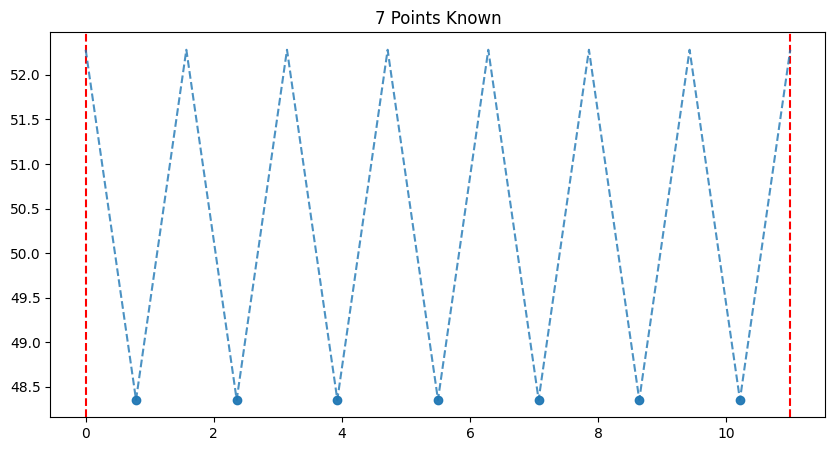

In [26]:
nonadapt_approx.display_graphs()

In [27]:
nonadapt_approx.add_n_points(8,function_type='optimal')

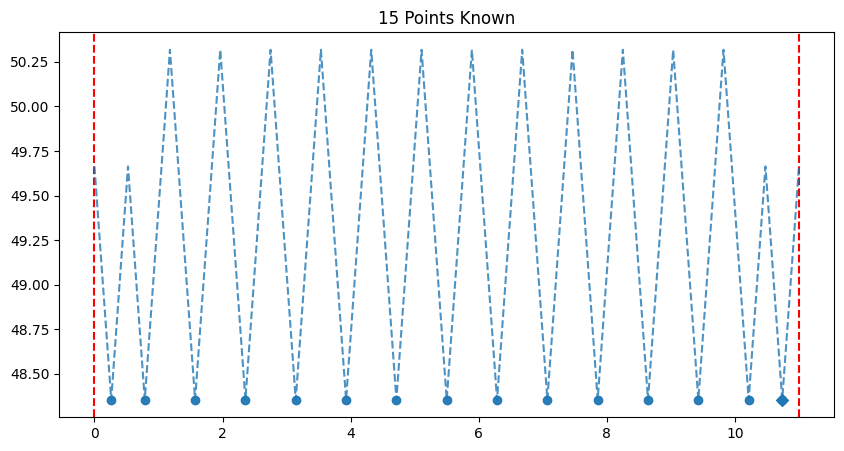

In [28]:
nonadapt_approx.display_graphs(1)

In [29]:
nonadapt_approx.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
7,1.964286,48.35369,52.282261,50.317975
8,1.964286,48.35369,52.282261,50.317975
9,1.964286,48.35369,52.282261,50.317975
10,1.964286,48.35369,52.282261,50.317975
11,1.964286,48.35369,52.282261,50.317975
12,1.964286,48.35369,52.282261,50.317975
13,1.964286,48.35369,52.282261,50.317975
14,1.964286,48.35369,52.282261,50.317975
15,0.982143,48.35369,50.317975,49.335833


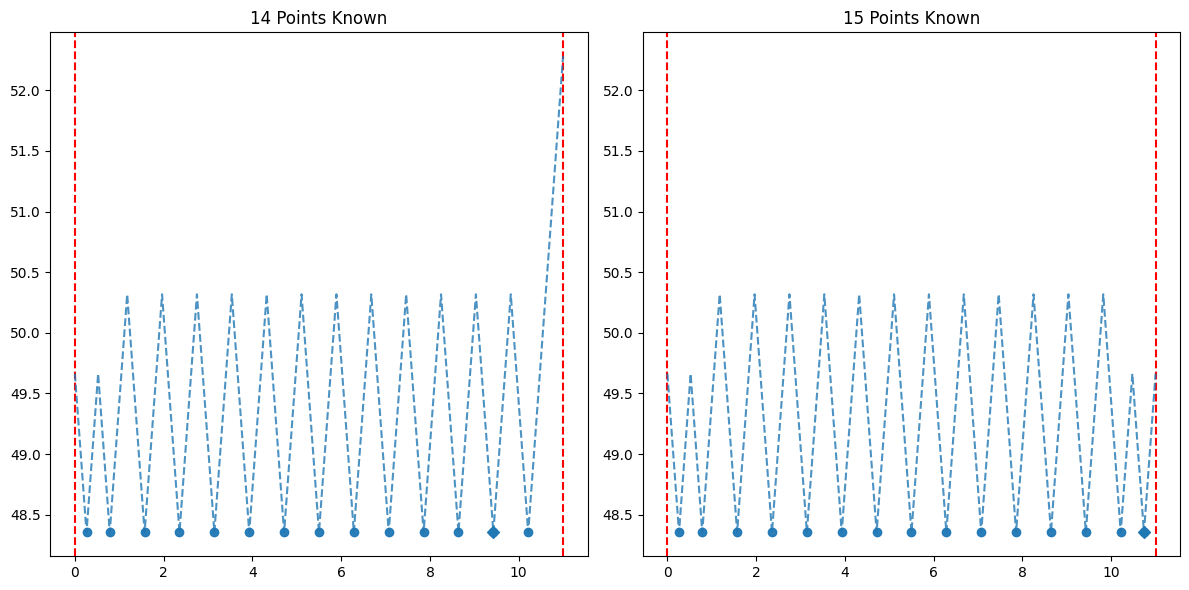

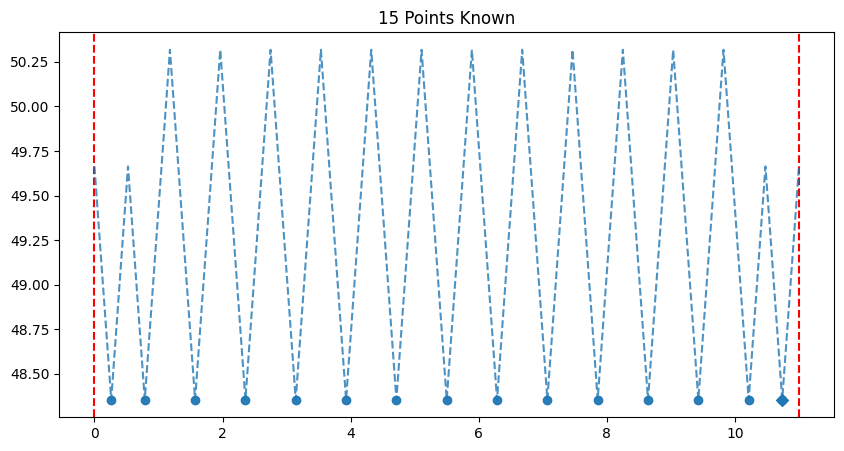

In [30]:
nonadapt_approx.display_graphs(2)

In [31]:
new_approx=ApproximateMaxima((-1,19),3)

In [32]:
new_approx.add_n_points(3,function_type='optimal')

In [33]:
new_approx.add_n_points(8,function_type='random')

In [34]:
new_approx.add_n_points(12,function_type='optimal')

In [35]:
new_approx.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,15.000000,-26.166315,3.833685,-11.166315
2,15.000000,-26.166315,3.833685,-11.166315
3,5.000000,-26.166315,-16.166315,-21.166315
4,5.000000,-26.166315,-16.166315,-21.166315
5,2.055660,-20.277636,-16.166315,-18.221976
6,0.777174,-17.720662,-16.166315,-16.943489
7,0.388587,-17.720662,-16.943489,-17.332076
8,0.388587,-17.720662,-16.943489,-17.332076
9,0.067575,-17.720662,-17.585512,-17.653087


In [36]:
failed_approx=ApproximateMaxima((1,9),17,sample_function='pow(x,10)')

In [44]:
failed_approx=ApproximateMaxima((1,9),17,starting_points=[(1,8),(2,5),(8,9),(3,12),(1.9,20)])

ValueError: The pairs of points (1.9, 20.0) and (2.0, 5.0) violate the Lipschitz continuity with constraint 17.

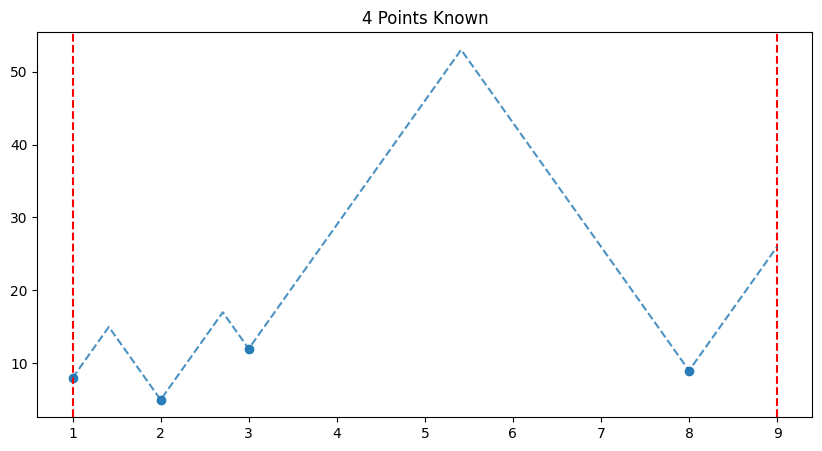

In [39]:
failed_approx.display_graphs()